# Matplotlib Weather API Example
In this notebook, we will plot some charts to show the weather forecast for a given location.

We will use Matplotlib for plotting the charts. Before that, we will get weather data from the National Weather Service API (Application Programming Interface).

You can read about the API web service here:
[National Weather Service](https://www.weather.gov/documentation/services-web-api).

In [3]:
# Import the libraries needed for this notebook.
# We will use matplotlib.pyplot for plotting graphs
# numpy is useful for manipulating arrays
# requests is for handling http requests 
import matplotlib.pyplot as plt
import numpy as np
import requests as r

In [4]:
# First we will do some set up for making the http request for a given location.

# Set the latitude and longitude of the location.
# (You can copy and paste the numbers after the equals sign into Google Maps to see the location)
lat, long = 39.7414, -105.0054 

# The URL for the request is below.
location_url = 'https://api.weather.gov/'+f"points/{lat},{long}"

# print the URL to make sure it looks ok.
print(location_url)

https://api.weather.gov/points/39.7414,-105.0054


In [8]:
# Now we will get data from the NWS website. We will make the request to the URL we created.
# The response will come back in JSON format, which is basically a dictionary. 

# Before we make the request, we need to include the user agent in in request header.
# This is to prevent the website blocking our request.
headers = {
    'User-Agent': 'Data Science 1001 Class!'
}

# Make the http request
response = r.get(location_url, headers=headers)

# If all is well, the response code should be 200
print(response.status_code)

200


In [18]:
# The response is text in a JSON format. This is essentially the same as a Python dictionary.
# json_data = response.json()
print(j_data.keys())

dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])


In [19]:
for key in j_data.keys():
    print(j_data[key])

['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 's': 'https://schema.org/', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#', 'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'}, 'city': 's:addressLocality', 'state': 's:addressRegion', 'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'}, 'bearing': {'@type': 's:QuantitativeValue'}, 'value': {'@id': 's:value'}, 'unitCode': {'@id': 's:unitCode', '@type': '@id'}, 'forecastOffice': {'@type': '@id'}, 'forecastGridData': {'@type': '@id'}, 'publicZone': {'@type': '@id'}, 'county': {'@type': '@id'}}]
https://api.weather.gov/points/39.89,-105
Feature
{'type': 'Point', 'coordinates': [-105, 39.89]}
{'@id': 'https://api.weather.gov/points/39.89,-105', '@type': 'wx:Point', 'cwa': 'BOU', 'forecastOffice': 'https://api.weather.gov/offices/BOU', 'gridId': 'BOU',

In [22]:
print(j_data['properties'])

{'@id': 'https://api.weather.gov/points/39.89,-105', '@type': 'wx:Point', 'cwa': 'BOU', 'forecastOffice': 'https://api.weather.gov/offices/BOU', 'gridId': 'BOU', 'gridX': 63, 'gridY': 68, 'forecast': 'https://api.weather.gov/gridpoints/BOU/63,68/forecast', 'forecastHourly': 'https://api.weather.gov/gridpoints/BOU/63,68/forecast/hourly', 'forecastGridData': 'https://api.weather.gov/gridpoints/BOU/63,68', 'observationStations': 'https://api.weather.gov/gridpoints/BOU/63,68/stations', 'relativeLocation': {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-104.97884, 39.911166]}, 'properties': {'city': 'Northglenn', 'state': 'CO', 'distance': {'unitCode': 'wmoUnit:m', 'value': 2966.0385944932}, 'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 217}}}, 'forecastZone': 'https://api.weather.gov/zones/forecast/COZ040', 'county': 'https://api.weather.gov/zones/county/COC001', 'fireWeatherZone': 'https://api.weather.gov/zones/fire/COZ240', 'timeZone': 'America/Denver', 'r

In [23]:
print(j_data['properties']['forecastHourly'])

https://api.weather.gov/gridpoints/BOU/63,68/forecast


In [31]:
forecast_request = r.get(j_data['properties']['forecast'], headers=headers)

In [32]:
forecast_request.status_code

200

In [33]:
forecast = forecast_request.json()

In [35]:
print(forecast['properties'])

{'units': 'us', 'forecastGenerator': 'BaselineForecastGenerator', 'generatedAt': '2025-12-22T21:18:20+00:00', 'updateTime': '2025-12-22T21:06:32+00:00', 'validTimes': '2025-12-22T15:00:00+00:00/P7DT13H', 'elevation': {'unitCode': 'wmoUnit:m', 'value': 1676.0952}, 'periods': [{'number': 1, 'name': 'This Afternoon', 'startTime': '2025-12-22T14:00:00-07:00', 'endTime': '2025-12-22T18:00:00-07:00', 'isDaytime': True, 'temperature': 75, 'temperatureUnit': 'F', 'temperatureTrend': None, 'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0}, 'windSpeed': '9 mph', 'windDirection': 'W', 'icon': 'https://api.weather.gov/icons/land/day/sct?size=medium', 'shortForecast': 'Mostly Sunny', 'detailedForecast': 'Mostly sunny. High near 75, with temperatures falling to around 68 in the afternoon. West wind around 9 mph, with gusts as high as 24 mph.'}, {'number': 2, 'name': 'Tonight', 'startTime': '2025-12-22T18:00:00-07:00', 'endTime': '2025-12-23T06:00:00-07:00', 'isDaytime': False

In [36]:
hourly = forecast['properties']['periods']

In [37]:
len(hourly)

14

In [38]:
type(hourly)

list

In [49]:
x = []
y = []
for hour in hourly:
    print(
    print(f"Hour {hour['number']} temperature(degrees F):{hour['temperature']}")
    x.append(hour['number'])
    y.append(hour['temperature'])


Hour 1 temperature(degrees F):75
Hour 2 temperature(degrees F):41
Hour 3 temperature(degrees F):64
Hour 4 temperature(degrees F):41
Hour 5 temperature(degrees F):65
Hour 6 temperature(degrees F):42
Hour 7 temperature(degrees F):68
Hour 8 temperature(degrees F):40
Hour 9 temperature(degrees F):62
Hour 10 temperature(degrees F):34
Hour 11 temperature(degrees F):50
Hour 12 temperature(degrees F):26
Hour 13 temperature(degrees F):44
Hour 14 temperature(degrees F):29


In [50]:
print(x, y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [75, 41, 64, 41, 65, 42, 68, 40, 62, 34, 50, 26, 44, 29]


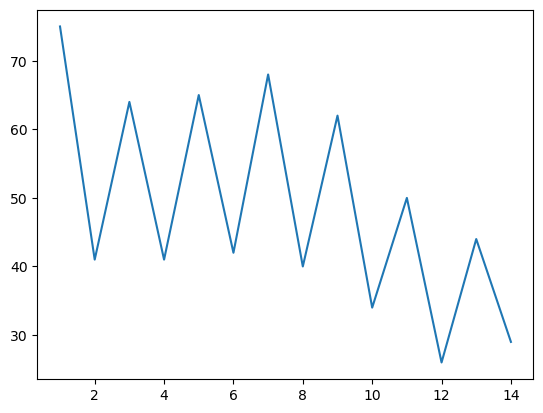

In [52]:
plt.plot(x, y)
